In [1]:
#import module folder containing general functions used frequently
modulepath = '/Users/mo2016/Documents/modelling/6eq/modules'
import sys
sys.path.append(modulepath)

#importing functions from that module folder
from parametercombination_analysis import *
from randomfunctions import wavelenght_from_dispersion, plot_highest_dispersion
from class_circuit_eq import *
from lhs import *
from findsteadystates_functions import *
from dispersionrelation_functions import *
# from lsafunctions import jacobianlsa


#other imports
import time
import datetime
import scipy.io
import numpy as np
from numpy import linalg as LA
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import re
#path of folder containing code, results, parameter files
path = '/Users/mo2016/Documents/modelling/6eq/parameter_space_search'
PCApath = '/Users/mo2016/Documents/modelling/6eq/PCA'

from datetime import date, timedelta

# date_yesterday = (date.today() - timedelta(2)).isoformat()
# date_yesterday = str(date.today())

# Functions for Data Analysis of parameter search output

In [2]:
# date = '2020-11-26'
circuit_n=2

This function obtains Turing IDs from all dataframes of that date and put them in a dictionary with their dataframe number.

TI/TII and monostable/multistable systems can be filtered



In [3]:
# turing_type indicates if we want the dictionary to contain only TI or also TI and TII. 
# ss_n indicates if we want only monostable systems in our dictionary (ss_n=1) or multistable (ss_n =/ 1).

def ID_df_location_search(date,turing_type,ss_n):
    ID_df_location = {}
    for df_n in range (64):
        with open(path + '/results/output/output_%s/output.%r-1'%(date,df_n), 'r') as input:
            input_ = input.read().split("\n\n")   #\n\n denotes there is a blank line in between paragraphs.
        for line in input_:
                if turing_type == 'TI':
                    if 'Turing I ' in line:
                        ID = re.findall(r'\d+\.{0,1}\d*', line)
                        if ss_n==1: #to filter turing systems with only one steady state
                            ss_n_line = line.count('[')
                            if ss_n_line == 1:
                                ID_df_location[ID[0]] = df_n
                        else:
                            ss_n_line = line.count('[')
                            if ss_n_line > 1:
                                ID_df_location[ID[0]] = df_n

                if turing_type == 'TII':
                    if 'Turing II ' in line:
                        ID = re.findall(r'\d+\.{0,1}\d*', line)
                        if ss_n==1: #to filter turing systems with only one steady state
                            ss_n_line = line.count('[')
                            if ss_n_line == 1:
                                ID_df_location[ID[0]] = df_n
                        else:
                            ss_n_line = line.count('[')
                            if ss_n_line > 1:
                                ID_df_location[ID[0]] = df_n



                        
                if turing_type == 'TI-II': #option activated if interested in TII as well
                    if 'Turing I ' in line or 'Turing II ' in line:
                        ID = re.findall(r'\d+\.{0,1}\d*', line)
                        if ss_n==1:
                            ss_n_line = line.count('[')
                            if ss_n_line == 1:
                                ID_df_location[ID[0]] = df_n
                        else:
                            ss_n_line = line.count('[')
                            if ss_n_line > 1:
                                ID_df_location[ID[0]] = df_n
    

    return ID_df_location



This function takes the dictionary with IDs and dataframe number and creates a dataframe with all turing parameter sets of the search.

In [10]:
def dictionary_to_parameter_df(ID_df_location):
    turing_df = pd.DataFrame()
    for ID, df_n in ID_df_location.items():
        df_parameterfile_filename = 'df_parameterfile_%s_ID%r.pkl'%(date,df_n)
        df_parameterfile= pickle.load( open(path +  '/parameterfiles/df_parameterfile_%s/%s'%(date,df_parameterfile_filename), "rb" ) )
        turing_df = turing_df.append(df_parameterfile.iloc[int(ID)])
    return turing_df



,ba,bb,bc,bd,be,bf,Va,Vb,Vc,Vd,...,keb,kbd,kce,kfe,kee,mua,mulva,d_B,d_A,n
index,,,,,,,,,,,,,,,,,,,,,
1,0.750430,0.199543,0.258382,0.061464,0.025507,0.491748,32.264076,25.101741,38.576819,46.299838,...,28.646674,2.761871,100000000000,2.285795,4.298121,0.048874,8.188070,0.001,2.16,2
2,0.030916,0.075467,0.061408,0.324122,0.068985,0.509610,425.524371,123.582942,102.512286,17.440846,...,95.312192,1.086484,100000000000,40.603761,3.291761,0.002952,0.004396,0.001,2.16,2
3,0.063957,0.316271,0.357416,0.132217,0.178833,0.933775,967.382846,15.232890,204.810667,273.712499,...,43.491546,15.180493,100000000000,0.457122,33.526394,0.892822,0.535467,0.001,2.16,2
4,0.342435,0.053251,0.797213,0.011769,0.183604,0.065340,482.662559,255.258794,33.163358,726.706856,...,2.247171,54.831585,100000000000,189.611589,0.299190,1.606147,0.004664,0.001,2.16,2
5,0.565240,0.012435,0.336552,0.150086,0.013078,0.590932,22.369260,785.622189,33.005125,48.876918,...,134.631290,2.989966,100000000000,2.285952,171.133753,0.384630,7.589841,0.001,2.16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31246,0.010481,0.023407,0.236608,0.129193,0.032269,0.734425,586.298959,63.200816,385.278818,559.609995,...,1.242205,10.548808,100000000000,1.720365,3.257114,5.286029,0.041264,0.001,2.16,2
31247,0.044664,0.199498,0.061800,0.133544,0.016179,0.035161,44.345160,140.682921,17.680774,476.742403,...,10.902841,0.144777,100000000000,13.830815,3.449756,0.434126,0.001019,0.001,2.16,2
31248,0.272196,0.934421,0.472243,0.208374,0.022704,0.059799,36.725979,18.553048,125.722965,43.140332,...,1.542620,0.162090,100000000000,141.483621,0.153962,32.465180,0.118283,0.001,2.16,2


In [40]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
        

def dictionary_to_parameter_df(ID_df_location, n_conditions, chunked_list):
    turing_df_list = [pd.DataFrame() for i in range(n_conditions)]
    for ID, df_n in ID_df_location.items():
        df_parameterfile_filename = 'df_parameterfile_%s_ID%r.pkl'%(date,df_n)
        df_parameterfile= pickle.load( open(path +  '/parameterfiles/df_parameterfile_%s/%s'%(date,df_parameterfile_filename), "rb" ) )
        
        if df_n in chunked_list[0]:
            turing_df_list[0] = turing_df_list[0].append(df_parameterfile.iloc[int(ID)])
       
        if df_n in chunked_list[1]:
            turing_df_list[1] = turing_df_list[1].append(df_parameterfile.iloc[int(ID)])
        
        if df_n in chunked_list[2]:
            turing_df_list[2] = turing_df_list[2].append(df_parameterfile.iloc[int(ID)])

        if df_n in chunked_list[3]:
            turing_df_list[3] = turing_df_list[3].append(df_parameterfile.iloc[int(ID)])

        if df_n in chunked_list[4]:
            turing_df_list[4] = turing_df_list[4].append(df_parameterfile.iloc[int(ID)])

        if df_n in chunked_list[5]:
            turing_df_list[5] = turing_df_list[5].append(df_parameterfile.iloc[int(ID)])

        if df_n in chunked_list[6]:
            turing_df_list[6] = turing_df_list[6].append(df_parameterfile.iloc[int(ID)])

        if df_n in chunked_list[7]:
            turing_df_list[7] = turing_df_list[7].append(df_parameterfile.iloc[int(ID)])


    return turing_df_list




# Kce robustness 0.1-10^4

In [41]:
n_conditions = 8
chunked_list = list(chunks(list(range(0,64)),int(64/n_conditions)))

date = '2020-11-27'

ID_df_location = ID_df_location_search(date, 'TI', 1)
turing_df_list1 = dictionary_to_parameter_df(ID_df_location, 8, chunked_list)


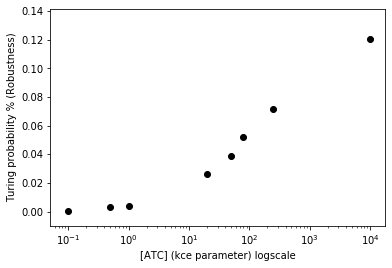

In [42]:
kce_list1 = [0.1,0.5,1,20,50,80,250,10000]
plt.scatter(kce_list1,list(100*len(i)/500000 for i in turing_df_list1),c='k')
plt.xscale('log')
plt.xlabel('[ATC] (kce parameter) logscale')
plt.ylabel('Turing probability % (Robustness)')
plt.ylim(-0.01)
plt.savefig(path + '/results/figures/parameter_distribution/kde_robustness.png')

# Kce robustness 10^5 -10^11

In [43]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
        

def dictionary_to_parameter_df(ID_df_location, n_conditions, chunked_list):
    turing_df_list = [pd.DataFrame() for i in range(n_conditions)]
    for ID, df_n in ID_df_location.items():
        df_parameterfile_filename = 'df_parameterfile_%s_ID%r.pkl'%(date,df_n)
        df_parameterfile= pickle.load( open(path +  '/parameterfiles/df_parameterfile_%s/%s'%(date,df_parameterfile_filename), "rb" ) )
        
        if df_n in chunked_list[0]:
            turing_df_list[0] = turing_df_list[0].append(df_parameterfile.iloc[int(ID)])
       
        if df_n in chunked_list[1]:
            turing_df_list[1] = turing_df_list[1].append(df_parameterfile.iloc[int(ID)])
        
        if df_n in chunked_list[2]:
            turing_df_list[2] = turing_df_list[2].append(df_parameterfile.iloc[int(ID)])

        if df_n in chunked_list[3]:
            turing_df_list[3] = turing_df_list[3].append(df_parameterfile.iloc[int(ID)])

#         if df_n in chunked_list[4]:
#             turing_df_list[4] = turing_df_list[4].append(df_parameterfile.iloc[int(ID)])

#         if df_n in chunked_list[5]:
#             turing_df_list[5] = turing_df_list[5].append(df_parameterfile.iloc[int(ID)])

#         if df_n in chunked_list[6]:
#             turing_df_list[6] = turing_df_list[6].append(df_parameterfile.iloc[int(ID)])

#         if df_n in chunked_list[7]:
#             turing_df_list[7] = turing_df_list[7].append(df_parameterfile.iloc[int(ID)])


    return turing_df_list




In [44]:
n_conditions = 4
chunked_list = list(chunks(list(range(0,64)),int(64/n_conditions)))

date = '2020-11-30'

ID_df_location = ID_df_location_search(date, 'TI', 1)
turing_df_list2 = dictionary_to_parameter_df(ID_df_location, 4, chunked_list)


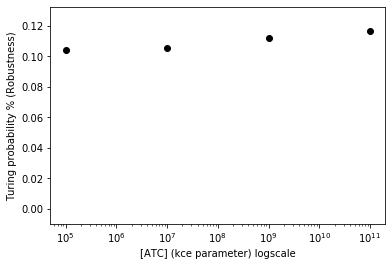

In [45]:
kce_list2 = [10**5,10**7,10**9,10**11]
plt.scatter(kce_list2,list(100*len(i)/500000 for i in turing_df_list2),c='k')
plt.xscale('log')
plt.xlabel('[ATC] (kce parameter) logscale')
plt.ylabel('Turing probability % (Robustness)')
plt.ylim(-0.01)
plt.savefig(path + '/results/figures/parameter_distribution/kde_robustness.png')

# All ATC conditions


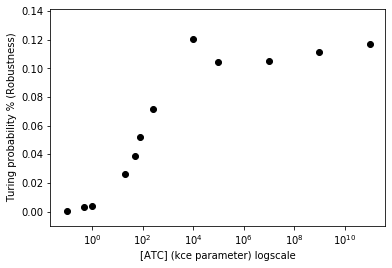

In [46]:
plt.scatter(kce_list1,list(100*len(i)/500000 for i in turing_df_list1),c='k')
plt.scatter(kce_list2,list(100*len(i)/500000 for i in turing_df_list2),c='k')

plt.xscale('log')
plt.xlabel('[ATC] (kce parameter) logscale')
plt.ylabel('Turing probability % (Robustness)')
plt.ylim(-0.01)
plt.savefig(path + '/results/figures/parameter_distribution/kde_robustness.png')

In [66]:
wvn_list = np.array(list(range(0,10000+1,2)))*np.pi/100
lis = np.linspace(1,1,10001)

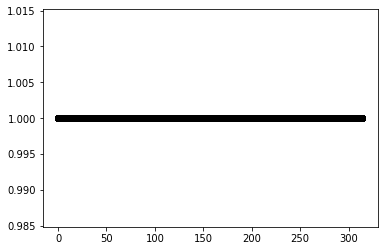

In [61]:
plt.scatter(wvn_list,lis,c='k')



In [67]:
len(wvn_list)

5001